<a href="https://colab.research.google.com/github/IngerMasha/week9/blob/main/day2_Exercises_XP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 1 : Visualizing The Distribution Of CGPA

In [1]:
import pandas as pd

student_data = pd.read_csv('Student Mental health.csv')
print("Dataset info:")
print(student_data.info())
print("\nFirst rows of the dataset:")
print(student_data.head())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 n

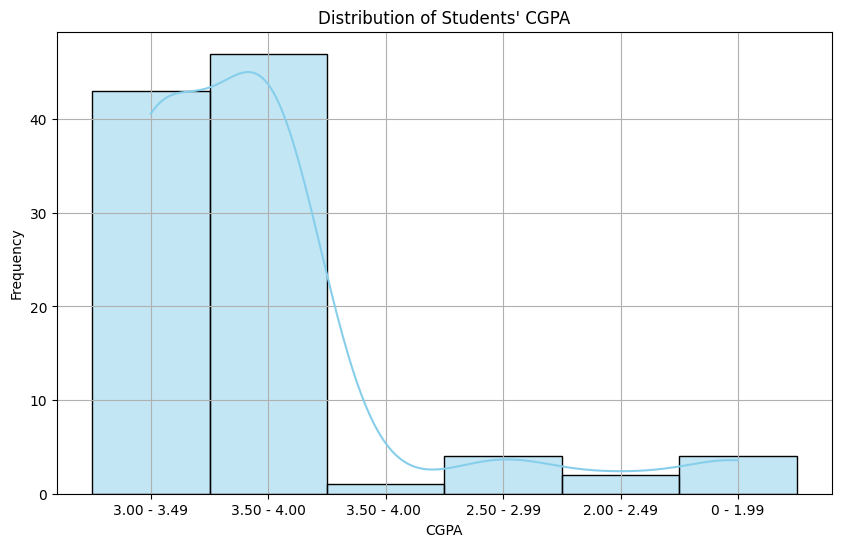

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(student_data['What is your CGPA?'], kde=True, color='skyblue', bins=10)

plt.title('Distribution of Students\' CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

Exercise 2: Comparing Anxiety Levels Across Different Genders

<Figure size 1000x600 with 0 Axes>

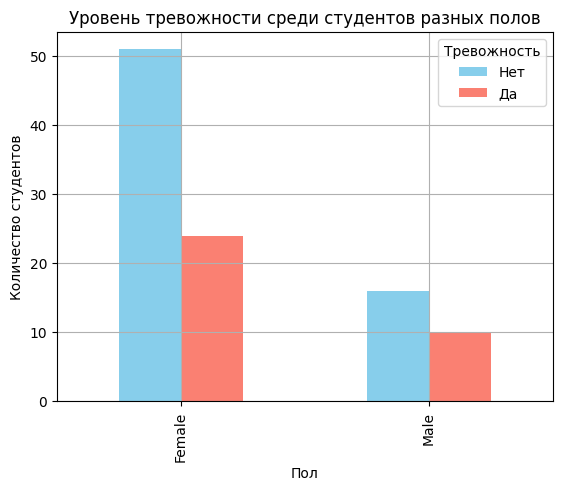

In [4]:
anxiety_counts = student_data.groupby(['Choose your gender', 'Do you have Anxiety?']).size().unstack()

plt.figure(figsize=(10, 6))
anxiety_counts.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])

plt.title('Anxiety Levels Among Students by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.legend(title='Anxiety', labels=['No', 'Yes'])
plt.grid(True)

plt.show()

Exercise 3: Exploring The Relationship Between Age And Panic Attacks

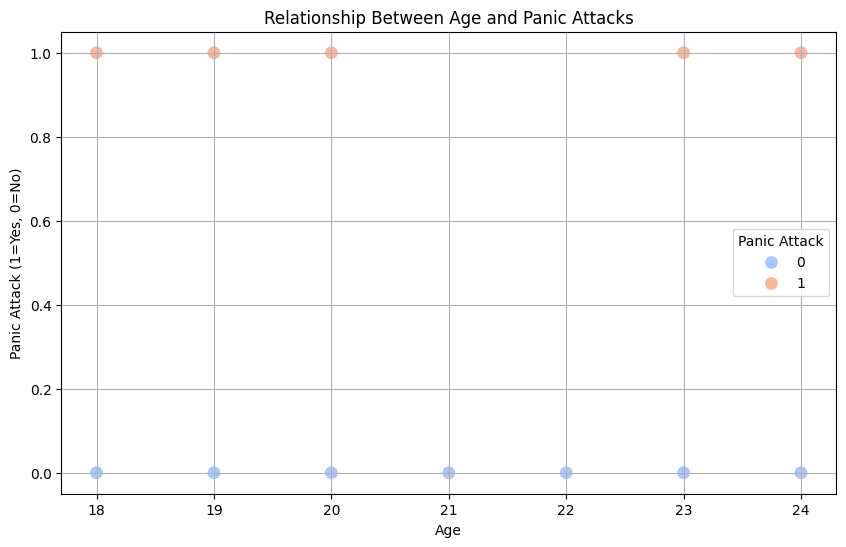

In [5]:
student_data['Panic Attack'] = student_data['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=student_data, x='Age', y='Panic Attack', hue='Panic Attack', palette='coolwarm', s=100)

plt.title('Relationship Between Age and Panic Attacks')
plt.xlabel('Age')
plt.ylabel('Panic Attack (1=Yes, 0=No)')
plt.grid(True)

plt.show()

Exercise 4: Visualizing Pairwise Relationships With Seaborn Pair Plot

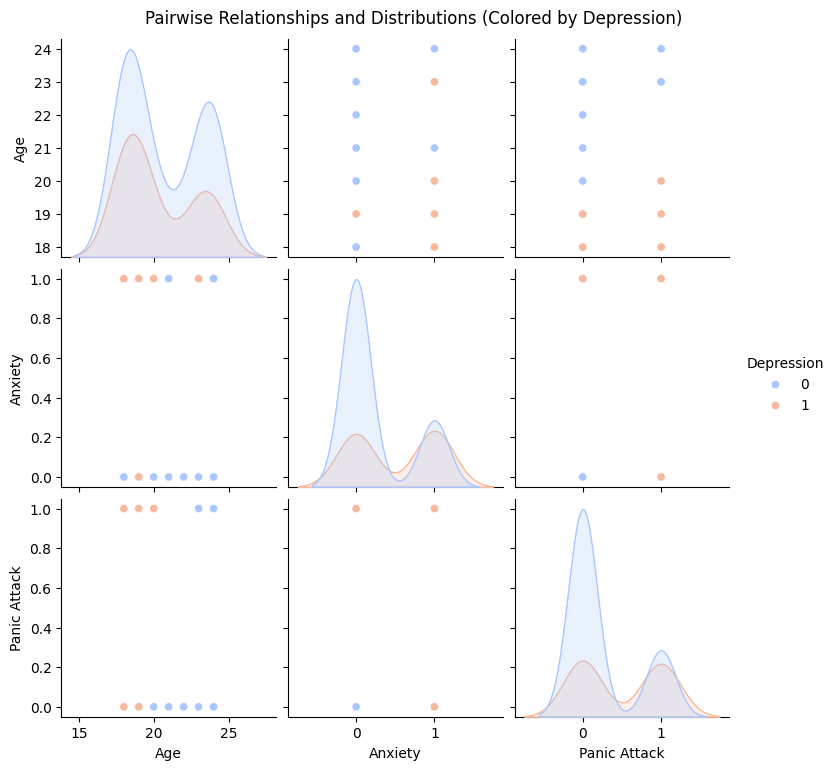

In [7]:
student_data['Depression'] = student_data['Do you have Depression?'].map({'Yes': 1, 'No': 0})
student_data['Anxiety'] = student_data['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
student_data['Panic Attack'] = student_data['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

subset = student_data[['Age', 'What is your CGPA?', 'Depression', 'Anxiety', 'Panic Attack']]

sns.pairplot(subset, hue='Depression', palette='coolwarm')

plt.suptitle('Pairwise Relationships and Distributions (Colored by Depression)', y=1.02)
plt.show()

Exercise 5: Creating A Heatmap To Visualize Correlations

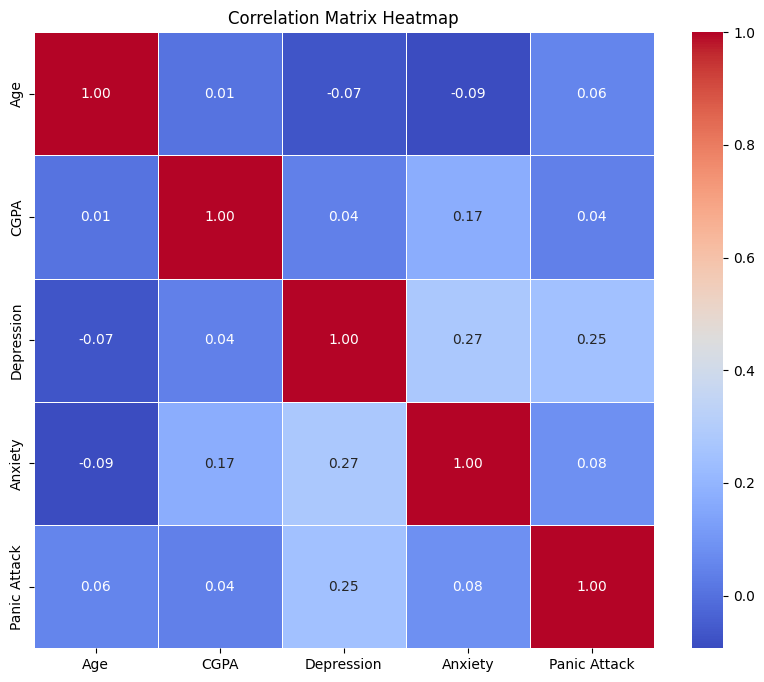

In [13]:
def convert_cgpa(cgpa_range):
    low, high = map(float, cgpa_range.split(' - '))
    return (low + high) / 2

student_data['CGPA'] = student_data['What is your CGPA?'].apply(convert_cgpa)
student_data['Depression'] = student_data['Do you have Depression?'].map({'Yes': 1, 'No': 0})
student_data['Anxiety'] = student_data['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
student_data['Panic Attack'] = student_data['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

subset = student_data[['Age', 'CGPA', 'Depression', 'Anxiety', 'Panic Attack']]

corr_matrix = subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation Matrix Heatmap')
plt.show()

Exercise 6: Analyzing Distributions And Relationships Using FacetGrid

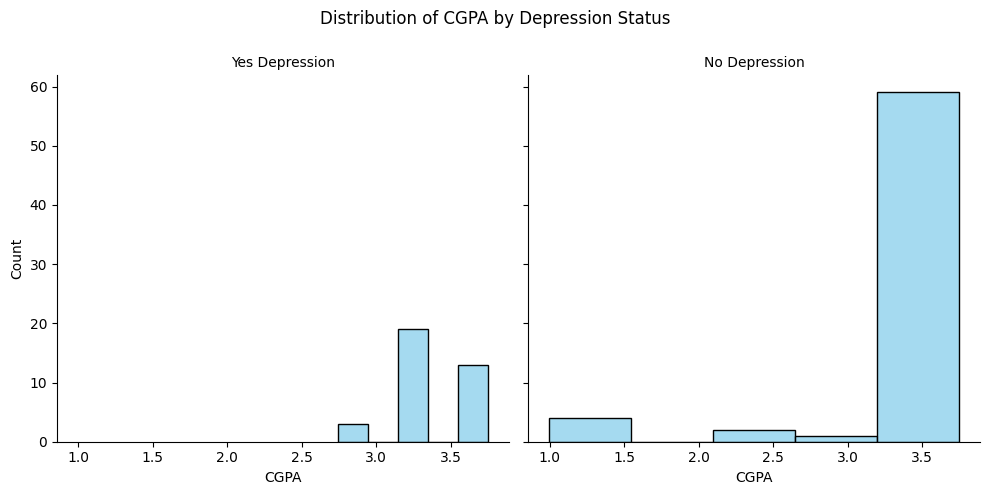

In [14]:
g = sns.FacetGrid(student_data, col="Do you have Depression?", height=5, aspect=1)
g.map(sns.histplot, "CGPA", bins=5, color="skyblue")

g.set_axis_labels("CGPA", "Count")
g.set_titles(col_template="{col_name} Depression")

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Distribution of CGPA by Depression Status")

plt.show()